[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\52695\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Calculating frequency distribution for stopwords
Calculating frequency distribution for noise


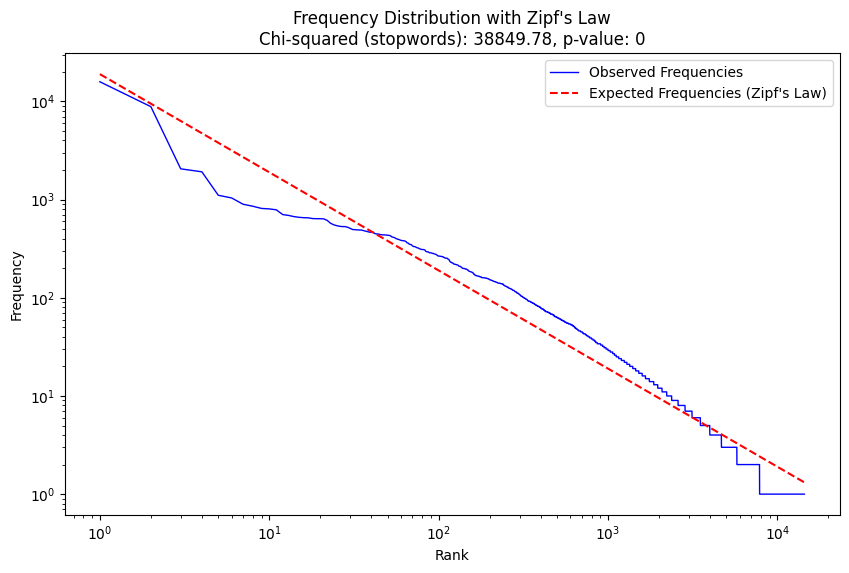

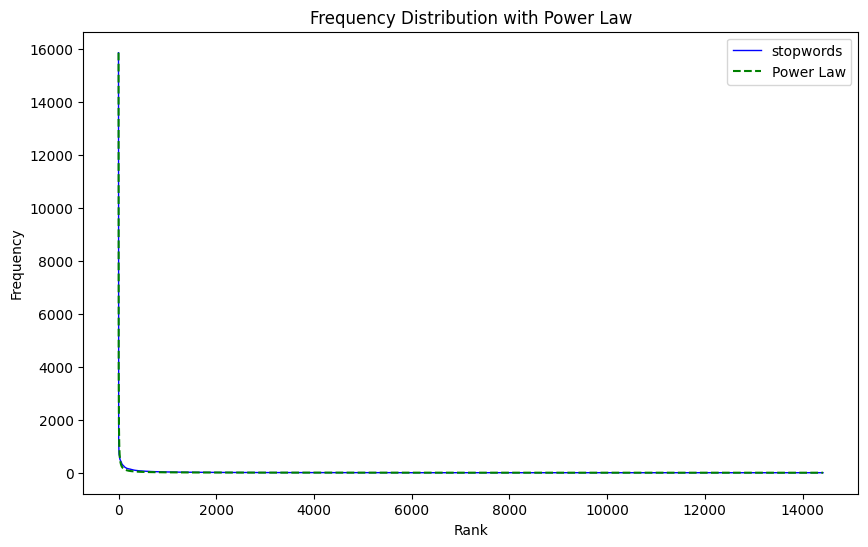

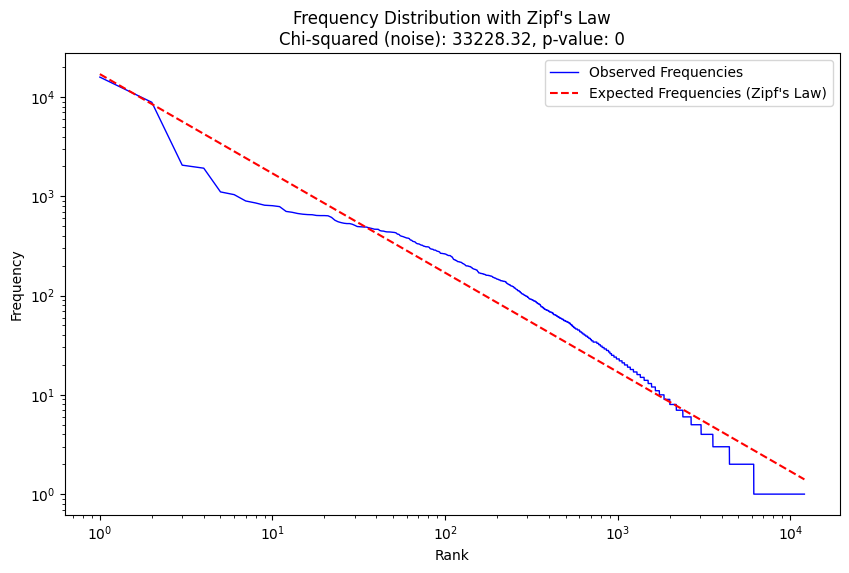

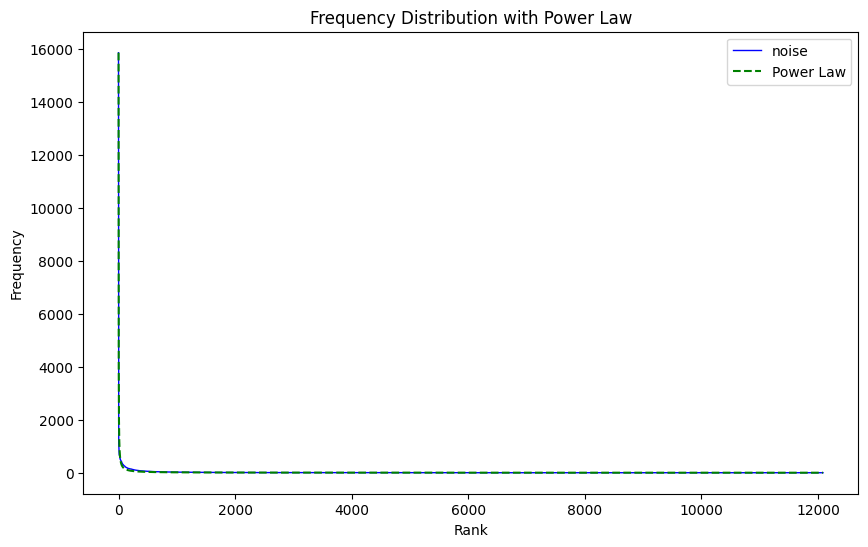

In [1]:
import string
import pickle
from frequency_calculation import calculate_frequency_distribution

def load_stopwords(filepath):
    with open(filepath, 'r') as file:
        stopwords = set(file.read().split())
    return stopwords

def filter_text(text, stopwords):
    words = text.split()
    text = text.translate(str.maketrans('', '', string.punctuation))
    filtered_words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(filtered_words)

with open('data/texts.pkl', 'rb') as file:
    texts = pickle.load(file)
    
stopwords = load_stopwords('data/Stopwords.txt')
stopwords_noise = load_stopwords('data/StopwordsNoise.txt')
stopwords = set(word.strip(",'[]") for word in stopwords)
stopwords_noise = set(word.strip(",'[]") for word in stopwords_noise)

text_stopwd = [filter_text(text, stopwords) for text in texts]
text_noise = [filter_text(text, stopwords_noise) for text in texts]

# convert list to string
text_stopwd = ' '.join(text_stopwd)
text_noise = ' '.join(text_noise)

calculate_frequency_distribution(text_stopwd, 'stopwords')
calculate_frequency_distribution(text_noise, 'noise')